In [10]:
import numpy as np
import pandas as pd
from pandas import read_csv
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing as pre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [11]:
#0 - Short Data
#1 - Julian
#2 - Count
#3 - T
#4 - Tmax
#5 - Tmin
#6 - U2
#7 - es (Tmin)
#8 - es(Tmin)
#9 - es
#10 - ea
#11 - Δ
#12 - P
#13 - RS
#14 - RH
#15 - RH_max
#16 - RH_min
#17 - Soil Temp
#18 - Rn
#19 - Ra
#20 - dt
#21 - es-ea
#22 - Eτο

## Optimisation instructions

1. Define unknows as xm1, xm2 ...
2. Define known as ym
3. Define in calc_y the extra parameters
4. Give an initial guess for the extra parameter

Solution
A = 0.003879689781926577
B = 1.112016853806
C = 0.06304654381865467
D = 0.0
R^2 correlation = 0.920918123000891


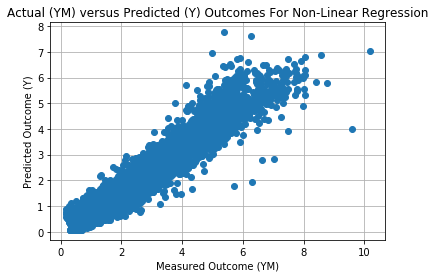

In [34]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data file
df = pd.read_excel('auth.xlsx', skiprows=[1, 2], index_col = 0)

xm1 = np.array(df["RS"])
xm2 = np.array(df["es-ea"])
xm3 = np.array(df["Julian"])
ym = np.array(df["Ετο"])

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
#     d = x[3]
    #y = a * xm1 + b                                             # linear regression
    y = a * xm1 ** 2 + b * np.sqrt(xm2) ** 2 + c                 # nonlinear regression
    return y

def objective(x):
    y = calc_y(x)
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    return obj

# initial guesses
x0 = np.zeros(5)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
# x0[3] = 0.0 # d

# optimize
solution = minimize(objective, x0, method='SLSQP')
x = solution.x
y = calc_y(x)

# print solution
print('Solution')

cA = 'A = ' + str(x[0])
print(cA)
cB = 'B = ' + str(x[1])
print(cB)
cC = 'C = ' + str(x[2])
print(cC)
cD = 'D = ' + str(x[3])
print(cD)
# cE = 'E = ' + str(x[4])
# print(cE)

cFormula = "Formula is : " + "\n" \
           + "A * WTI^B * HH^C * PROPANE^D"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n" + cObjective

#ym measured outcome
#y  predicted outcome

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym, y)
r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
plt.plot(ym, y, 'o')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
# plt.legend([cLegend])
plt.grid(True)
plt.show()